<a href="https://colab.research.google.com/github/DiazOnFire/FoodVision_V1/blob/main/InferenceForFoodVision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Here, we use the model we trained and import it here to predict what food item the uploaded image/link of image is.

In [2]:
#installing latest version of Transformers from Model Hub
!pip install git+https://github.com/huggingface/transformers.git

  Cloning https://github.com/huggingface/transformers.git to /tmp/pip-req-build-kwfeirgu
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/transformers.git /tmp/pip-req-build-kwfeirgu
  Resolved https://github.com/huggingface/transformers.git to commit 50726f9ea7afc6113da617f8f4ca1ab264a5e28a
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 58.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 51.6 MB/s eta 0:00:00
  Created wheel for transformers: filename=transformers-4.31.0.dev0-py3-none-any.whl size=7352265 sha256=7e729dced41e689f491e259c98c09b65908ef4516939b8d384a94e9a148f2416
  Stored in directory: /tmp/pip-ephem-wheel-cache-gi023ny6/wheels/e7/9c/5b/e1a9c8007c343041e61cc484433d512ea9274272e3fcbe7c16


In [3]:
#We import necessary Libraries
from transformers import ViTFeatureExtractor, ViTForImageClassification
from PIL import Image
import requests

Here, Enter link of the image you want to predict class of

In [5]:
#put url of image in the variable url given below.
url = 'https://skinnyspatula.com/wp-content/uploads/2021/11/Rasta_Pasta1.jpg'
image = Image.open(requests.get(url, stream=True).raw)

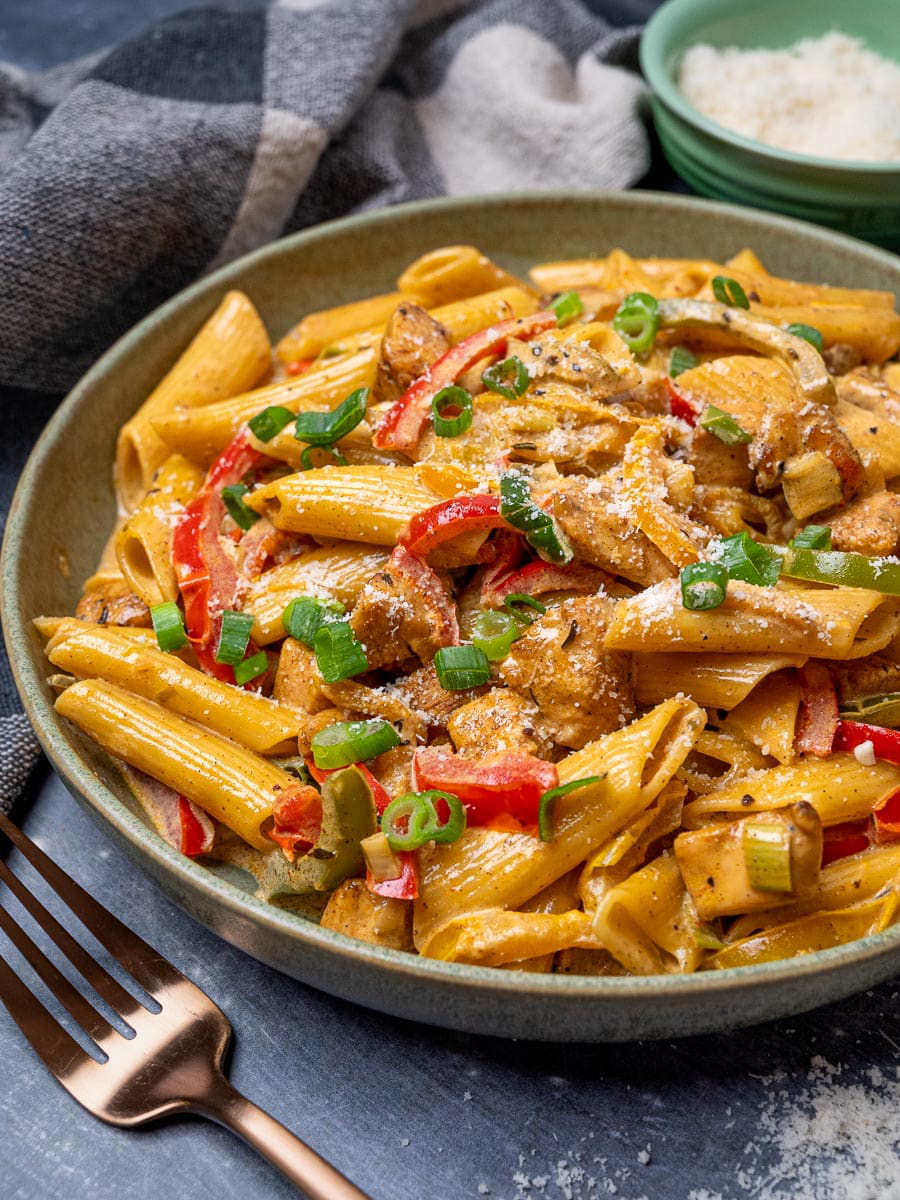

In [6]:
#Let's display the image
#from IPython.display import Image
display(image)

#Downloading Pre-trained model
 We download the model we have created and hosted on HuggingFace and use it here to predict the image given above

In [7]:
feature_extractor = ViTFeatureExtractor.from_pretrained("DiazOnFire/FoodVision")
model = ViTForImageClassification.from_pretrained("DiazOnFire/FoodVision")

/usr/local/lib/python3.10/dist-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


In [8]:
#Now we extract features of the image we gave above
inputs=feature_extractor(images=image,return_tensors="pt")

# Model Inference

In [9]:
outputs=model(**inputs)

In [10]:
logits=outputs.logits

In [11]:
predicted_class_idx = logits.argmax(-1).item()
print("Class of Food Item predicted by model is:", model.config.id2label[predicted_class_idx])

Class of Food Item predicted by model is: pasta


Pasta has been succesfully predicted, We can give the link of any other of the 4 classes too for the model to predict.

I have used online resources like blogs,videos and other repositories to understand how Transformers and HuggingFace work. I learnt quite a lot about PyTorch itself. This was purely a small project made in order to learn how these incredible tools work.